In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models, utils

In [0]:
# LOAD THE DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [0]:
# DEFINE THE LABELS OR CLASS NAMES
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hourse', 'ship', 'truck']

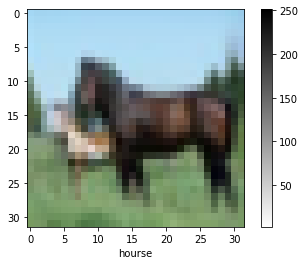

In [0]:
# VISUALIZE SOME IMAGES
IMG_INDEX = 12

plt.figure()
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.colorbar()
plt.show()

In [0]:
# NORMALIZE THE TRAINING IMAGES & TESTING IMAGES
train_images = utils.normalize(train_images)
test_images = utils.normalize(test_images)

train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
# BUILD THE CNN MODEL

# Initialize The CNN
model = models.Sequential()

# Add The First Conv2D Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))

#Add The First Max Pooling2D Layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Add The Second Conv2D Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add The Second Max Pooling2D Layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))

In [0]:
#SUMMARY
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Add The Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))

In [0]:
#SUMMARY
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
__________________________________________________

In [0]:
# COMPILE THE MODEL
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# TRAIN THE NETWORK
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.1, validation_data=(test_images, test_labels))

Epoch 1/10
1407/1407 [==============================] - 50s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 2/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 3/10
1407/1407 [==============================] - 50s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 4/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 5/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 6/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 7/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 -

In [0]:
# EVALUATE THE MODEL
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 3s 11ms/step - loss: 2.3026 - accuracy: 0.1000


(2.30259108543396, 0.10000000149011612)